# CME 241 Assignment 3

## Shaan Patel

### Question 1

When using a deterministic policy, the action $a$ is given by a fixed function $\pi (s)$ that depends on the state. In this situation, there is no randomness in the action decision, as the state determines what action will be taken.

As such, the 4 MDP Bellman Policy equations become the following:

$ V^{\pi_D}(s) = R(s, \pi_D(s)) + \gamma \sum_{s' \in N} P(s, \pi_D(s), s') V^{\pi_D}(s') $

$ V^{\pi_D}(s) = Q^{\pi_D}(s, \pi_D(s))$

$Q^{\pi_D}(s, \pi_D(s)) = R(s, \pi_D(s)) + \gamma \sum_{s' \in N} P(s, \pi_D(s), s') V^{\pi_D}(s') $

$Q^{\pi_D}(s, \pi_D(s)) = R(s, \pi_D(s)) + \gamma \sum_{s' \in N}P(s, \pi(s), s') Q^{\pi_D}(s', \pi_D(s')) $

As shown, the $ \sum_{a \in A}$ gets removed because for each $s$ there is a fixed action that is taken based on $\pi(s)$.

### Question 2

Note that the rewards, transition probabilities, and states do not depend on the explicit value of $s$. As a result, we can see that the explicit value of $s$ is irrelevant to the value function, thus implying that the value function is the same for all values of $s$. Thus, $V^*(s) = V^*(s + 1)$, and

$$V^*(s) = \max_{a \in A} [R(s,a) + \gamma V^*(s) \sum_{s' \in N} P(s,a,s')] $$

The sum over all states of $P(s,a,s')$ is 1, so we get

$$V^*(s) = \max_{a \in A} [R(s,a) + \gamma V^*(s)] $$

This causes $ \gamma V^*(s)$ to not depend on $a$, so it can be removed from the max equation.

$$ (1 - \gamma)V^*(s) = \max_{a \in A} R(s,a) $$

$$ R(s,a) = E[r_{t+1}|S_t = s, A_t = a] = (1 - a)a + (1+a)(1-a) $$
$$ = (1-a)(2a + 1) = 1 + a - 2a^2 $$

The values of $a$ are either 0 or 1, thus $\max_{a \in A} R(s,a) = 1 $, when $a$ is 0. Thus,

$$ V^*(s) = \frac{1}{1 - \gamma} = 2$$

To have an optimal deterministic policy, we should hit the optimal value function for each state. As a result, because the value function is the same for all states, the optimal choice for $a$ remains the same across all $s$. Thus,

$$ \pi^*(s) = 0 $$

### Question 3

The state space of this frog problem is all lilypads from 0 to $n$.
The action space is the set $A, B$
For the transition function, we have

if $s' = s - 1$, 
$$P(s,a,s') = \frac{s + 1}{2n} $$

if $s' = s + 1$,
$$P(s,a,s') = \frac{n-s + 1}{2n}$$

all other cases,
$$P(s,a,s') = \frac{1}{2n} $$

In this scenario, the frog has an equal chance of choosing either action, and thus there is a 1/2 chance of choosing either croak. In the case of croak A, the frog can only go one space forward or backward. Thus there is no way to go to any state aside from $i-1$ or $i+1$ given croak A. If the frog croaks B, then there is a $\frac{1}{n}$ chance it can land one space away from its previous state as well, so these are included in the calculation.

We want to make the value function show the probability of escaping. As such, the reward function should be an indicator of when the frog escapes. Thus, the reward will be 0 for all lilypads that are from 0 to $n-1$ and the $n$ lilypad wil have a reward of 1.

In [89]:
from typing import Tuple, Dict, Mapping
from rl.distribution import Categorical
from rl.markov_decision_process import FiniteMarkovDecisionProcess
from rl.policy import FinitePolicy
import numpy as np
import matplotlib.pyplot as plt

In [58]:
def calc_prob(b,a,x,n):
    if a == 0:
        if x == b-1:
            return b/n
        elif x == b+1:
            return (n-b)/n
        else:
            return 0
    elif a == 1:
        return 1/n
    else:
        return 0

def calc_list(b,a,n):
    if a == 0:
        return [b-1, b+1]
    elif a == 1:
        endlist = list(range(n+1))
        endlist.remove(b)
        return endlist
    else:
        return range(0,n)

class LilypadMDP(FiniteMarkovDecisionProcess[int,int]):
    def __init__(self, n):
        spaces = range(1,n)
        self.non_terminal_states = spaces
        actions = [0,1]
        self.mapping = {
            b: {
                a: Categorical(
                    {(x, 1 if x is n else 0): (calc_prob(b,a,x,n))
                    for x in calc_list(b,a,n)}
                ) for a in actions
            } for b in spaces
        }
        super().__init__(self.mapping)

In [86]:
def findoptimals(n):
    optimalpol = [0]*(n-1)
    lily = LilypadMDP(n)

    mapping = {
        b: Categorical({optimalpol[b-1]: 1}) for b in range(1,n)
    }
    newpol = FinitePolicy(mapping)
    MRP = lily.apply_finite_policy(newpol)
    lilyvalue = MRP.get_value_function_vec(1)
    
    power = pow(2,(n-1))
    for i in range(1,power):
        lilylist = [int(i) for i in list(np.binary_repr(i, width=(n-1)))]
        mapping = {
            b: Categorical({lilylist[b-1]:1}) for b in range(1,n)
        }
        newpol = FinitePolicy(mapping)
        MRP = lily.apply_finite_policy(newpol)
        newval = MRP.get_value_function_vec(1)
        if np.all(np.greater(newval,lilyvalue)):
            lilyvalue = newval
            optimalpol = lilylist
    
    return lilyvalue, optimalpol

x,y = findoptimals(3)
print(x)
print(y)


[0.57142857 0.71428571]
[1, 0]


In [87]:
x,y = findoptimals(6)
print(x)
print(y)

[0.65957447 0.70212766 0.72340426 0.74468085 0.78723404]
[1, 0, 0, 0, 0]


In [88]:
x,y = findoptimals(9)
print(x)
print(y)

[0.67567568 0.70523649 0.71368243 0.71790541 0.72128378 0.72550676
 0.7339527  0.76351351]
[1, 0, 0, 0, 0, 0, 0, 0]


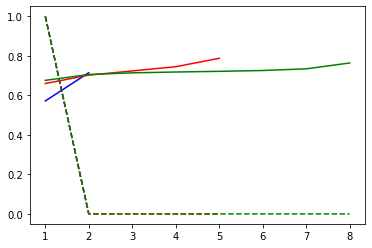

In [94]:
prob3, croak3 = findoptimals(3)
prob6, croak6 = findoptimals(6)
prob9, croak9 = findoptimals(9)

xaxis3 = [1,2]
xaxis6 = [1,2,3,4,5]
xaxis9 = [1,2,3,4,5,6,7,8]

plt.plot(xaxis3,prob3, c = 'blue')
plt.plot(xaxis3,croak3, c = 'blue', linestyle = 'dashed')
plt.plot(xaxis6,prob6, c = 'red')
plt.plot(xaxis6,croak6, c = 'red', linestyle = 'dashed')
plt.plot(xaxis9,prob9, c = 'green')
plt.plot(xaxis9,croak9, c = 'green', linestyle = 'dashed')

The graph above shows the Optimal Croaks and Optimal Probabilities for each lilypad given a specific $n$ (blue is 3 pads, red is 6, and green is 9). As we can see, the Optimal Croak strategy remains the same across all $n$; use croak B on the first pad and then use croak A for all other pads. This is due to the fact that using croak A on pad 1 will lead to a significantly higher chance of getting eaten than using croak B. For all other situations, using croak A is better as the chance of getting eaten is 0, and there is no time constraint on getting to the other side.

### Question 4

The Expected Discounted Sum of Costs can be modeled through the MDP Bellman Policy Equation

$$V^\pi(s) = \sum_{a \in A} \pi(s,a) [R(s,a) + \gamma \sum_{s' \in N} P(s,a,s') V^\pi(s')] $$

In the myopic case, $\gamma$ is 0, so the equation simplifies to 

$$V^\pi(s) = \sum_{a \in A} \pi(s,a) R(s,a) $$

We are in the continuous case, so the sum is replaced with an integral, giving us

$$V^\pi(s) = \int_{A} \pi(s,a) R(s,a) da$$

The reward function $R$ is the expected return in the next period given current state $s$ and action $a$. Thus, because $s'$ follows a $N(s,\sigma)$ distribution, we can see that

$$ R(s,a) = E[e^{as'}] = \int_{\infty}^{\infty} e^{ax} \frac{1}{\sigma \sqrt{2\pi}} e^{\frac{-1}{2}(\frac{x - s}{\sigma})^2} dx$$

In the exponents, we have $2\sigma^2 ax - x^2 + 2xs - s^2 $ so we can complete the square to get $$(-x^2 + 2x(s + \sigma^2 a) - (s + \sigma^2 a)^2) + 2\sigma^2 as +  \sigma^4 a^2 $$ or $$-(x - s - \sigma^2 a)^2 + 2\sigma^2 as + \sigma^4 a^2  $$

Because the latter two terms have no x, we can take them out of the integral

$$ e^{\frac{\sigma^2 a (2s + \sigma^2 a)}{2\sigma^2}} \int_\infty^\infty \frac{1}{\sigma \sqrt{2\pi}} e^{\frac{-1}{2} (\frac{x - s - \sigma^2 a}{\sigma})^2} dx$$

The integral thus simplifies to the pdf of a $N(s + \sigma^2 a, \sigma)$ distribution, so integrating it over all real values equates it to 1. So,

$$R(s,a) = e^{\frac{a (2s + \sigma^2 a)}{2}} $$

Going back to the value function we see that

$$V^\pi(s) = \int_A \pi(s,a) e^{\frac{a (2s + \sigma^2 a)}{2}} da$$

For any s, the minimum value of this function (provided that $\pi(s,a)$ is 1 at this minimum value and 0 everywhere else) is when $a(2s + \sigma^2 a)$ is at its minimum. Therefore, the minimum is reached when $2s + 2\sigma^2 a= 0$, or

$$ a = \frac{-s}{\sigma^2} $$

This provides a cost of $e^{\frac{-ss'}{\sigma^2}}$